In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clr
from matplotlib.colors import ListedColormap

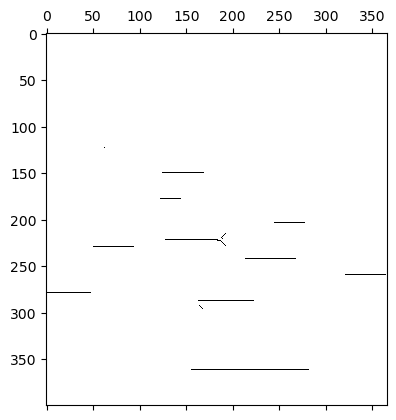

In [2]:
text_file = open("data_1.txt", "r")
arr = text_file.read()
npEnv = np.array([]) #Create environment

for i in range(len(arr)):
    npEnv = np.append(npEnv, ord(arr[i]))

environment = npEnv.reshape(400, 366)

#ordinance
# '.' = 46
# 'W' = 87
# 'S' = 83
# 'T' = 84

cmap = ListedColormap (['w', 'k'])
plt.matshow(environment, cmap = cmap)
plt.show()



### Finding Start and Target points

In [3]:
def start(array):
    for i in range(400):
        for j in range(366):
            if (array[i][j] == 83):
                return i, j

s = start(environment)
print(f'The starting point is: {s}')

def target(array):
    for i in range(400):
        for j in range(366):
            if (array[i][j] == 84):
                return i, j
            
t = target(environment)
print(f'The target point is: {t}')

The starting point is: (123, 62)
The target point is: (314, 212)


### Calculating Distance

In [4]:
def manhattan(i, j):
    if (t[0] == i):
        h = 0
    elif (t[0] > i):
        h = t[0] - i
    else:
        h = i - t[0]
    
    if (t[1] == j):
        pass
    elif (t[1] > j):
        h = h + t[1] - j
    else:
        h = h + j - t[1]
    
    return (h*10)

### Check for Target

In [5]:
def isTarget(i, j):
    if ((i, j) == t):
        return 1
    else:
        return 0

### Walkability

In [6]:
def isValid(i, j, arr):
    if (environment[i][j] == 87):
        return 0
    if (i, j) in arr:
        return 0
    for k in path:
        if (k == (i, j)):
            return 0
    return 1

# Main Function

In [7]:
path = []
openList = []
closedList = []

# dictionary, square : g, h
scores = {}
#dictionart, square : f
fscores = {}

# dictionary, children : parent
parent = {}

# add starting square to open list
openList.append(s)

# current square
current = s

scores[current] = (0, manhattan(current[0], current[1]))

a = 1
while a == 1:
    closedList.append((current))
    
    F = 9999
    for i in range(len(openList)):
        if openList[i] in closedList:
            continue
        elif (fscores[openList[i]] < F):
            F = fscores[openList[i]]
            current = openList[i]
        else:
            continue
            
    print(current)
    
    # North-West
    g = 14
    h = manhattan(current[0] - 1, current[1] - 1)
    f = g + h
    if (isTarget(current[0] - 1, current[1] -1) == 1):
        parent[(current[0] - 1, current[1] -1)] = current
        current = (current[0] - 1, current[1] - 1)
        scores[current] = (g, 0)
        break
    elif (isValid(current[0] - 1, current[1] - 1, closedList) == 0):
        pass
    elif ((current[0] - 1, current[1] - 1) in openList):
        pass
    else:
        openList.append((current[0] - 1, current[1] - 1))
        scores[(current[0] - 1, current[1] - 1)] = (g, h)
        fscores[(current[0] - 1, current[1] - 1)] = f
        parent[(current[0] - 1, current[1] - 1)] = current
        
    # North
    g = 10
    h = manhattan(current[0] - 1, current[1])
    f = g + h
    if (isTarget(current[0] - 1, current[1]) == 1):
        parent[(current[0] - 1, current[1])] = current
        current = (current[0] - 1, current[1])
        scores[current] = (g, 0)
        break
    elif (isValid(current[0] - 1, current[1], closedList) == 0):
        pass
    elif ((current[0] - 1, current[1]) in openList):
        if (g < scores[(current[0] - 1, current[1])][0]):
            scores[(current[0] - 1, current[1])] = (g, h)
            fscores[(current[0] - 1, current[1])] = f
            parent[(current[0] - 1, current[1])] = current
        else:
            pass
    else:
        openList.append((current[0] - 1, current[1]))
        scores[(current[0] - 1, current[1])] = (g, h)
        fscores[(current[0] - 1, current[1])] = f
        parent[(current[0] - 1, current[1])] = current
        
    # North-East
    g = 14
    h = manhattan(current[0] - 1, current[1] + 1)
    f = g + h
    if (isTarget(current[0] - 1, current[1] + 1) == 1):
        parent[(current[0] - 1, current[1] + 1)] = current
        current = (current[0] - 1, current[1] + 1)
        scores[current] = (g, 0)
        break
    elif (isValid(current[0] - 1, current[1] + 1, closedList) == 0):
        pass
    elif ((current[0] - 1, current[1] + 1) in openList):
        pass
    else:
        openList.append((current[0] - 1, current[1] + 1))
        scores[(current[0] - 1, current[1] + 1)] = (g, h)
        fscores[(current[0] - 1, current[1] + 1)] = f
        parent[(current[0] - 1, current[1] + 1)] = current
    
    # East
    g = 10
    h = manhattan(current[0], current[1] + 1)
    f = g + h
    if (isTarget(current[0], current[1] + 1) == 1):
        parent[(current[0], current[1] + 1)] = current
        current = (current[0], current[1] + 1)
        scores[current] = (g, 0)
        break
    elif (isValid(current[0], current[1] + 1, closedList) == 0):
        pass
    elif ((current[0], current[1] + 1) in openList):
        if (g < scores[(current[0], current[1] + 1)][0]):
            scores[(current[0], current[1] + 1)] = (g, h)
            fscores[(current[0], current[1] + 1)] = f
            parent[(current[0], current[1] + 1)] = current
        else:
            pass
    else:
        openList.append((current[0], current[1] + 1))
        scores[(current[0], current[1] + 1)] = (g, h)
        fscores[(current[0], current[1] + 1)] = f
        parent[(current[0], current[1] + 1)] = current
        
    # South-East
    g = 14
    h = manhattan(current[0] + 1, current[1] + 1)
    f = g + h
    if (isTarget(current[0] + 1, current[1] + 1) == 1):
        parent[(current[0] + 1, current[1] + 1)] = current
        current = (current[0] + 1, current[1] + 1)
        scores[current] = (g, 0)
        break
    elif (isValid(current[0] + 1, current[1] + 1, closedList) == 0):
        pass
    elif ((current[0] + 1, current[1] + 1) in openList):
        pass
    else:
        openList.append((current[0] + 1, current[1] + 1))
        scores[(current[0] + 1, current[1] + 1)] = (g, h)
        fscores[(current[0] + 1, current[1] + 1)] = f
        parent[(current[0] + 1, current[1] + 1)] = current
        
    # South
    g = 10
    h = manhattan(current[0] + 1, current[1])
    f = g + h
    if (isTarget(current[0] + 1, current[1]) == 1):
        parent[(current[0] + 1, current[1])] = current
        current = (current[0] + 1, current[1])
        scores[current] = (g, 0)
        break
    elif (isValid(current[0] + 1, current[1], closedList) == 0):
        pass
    elif ((current[0] + 1, current[1]) in openList):
        if (g < scores[(current[0] + 1, current[1])][0]):
            scores[(current[0] + 1, current[1])] = (g, h)
            fscores[(current[0] + 1, current[1])] = f
            parent[(current[0] + 1, current[1])] = current
        else:
            pass
    else:
        openList.append((current[0] + 1, current[1]))
        scores[(current[0] + 1, current[1])] = (g, h)
        fscores[(current[0] + 1, current[1])] = f
        parent[(current[0] + 1, current[1])] = current
        
    # South-West
    g = 14
    h = manhattan(current[0] + 1, current[1] - 1)
    f = g + h
    if (isTarget(current[0] + 1, current[1] - 1) == 1):
        parent[(current[0] + 1, current[1] - 1)] = current
        current = (current[0] + 1, current[1] - 1)
        scores[current] = (g, 0)
        break
    elif (isValid(current[0] + 1, current[1] - 1, closedList) == 0):
        pass
    elif ((current[0] + 1, current[1] - 1) in openList):
        pass
    else:
        openList.append((current[0] + 1, current[1] - 1))
        scores[(current[0] + 1, current[1] - 1)] = (g, h)
        fscores[(current[0] + 1, current[1] - 1)] = f
        parent[(current[0] + 1, current[1] - 1)] = current
        
    #West
    g = 10
    h = manhattan(current[0], current[1] - 1)
    f = g + h
    if (isTarget(current[0], current[1] - 1) == 1):
        parent[(current[0], current[1] - 1)] = current
        current = (current[0], current[1] - 1)
        scores[current] = (g, 0)
        break
    elif (isValid(current[0], current[1] - 1, closedList) == 0):
        pass
    elif ((current[0], current[1] - 1) in openList):
        if (g < scores[(current[0], current[1] - 1)][0]):
            scores[(current[0], current[1] - 1)] = (g, h)
            fscores[(current[0], current[1] -1)] = f
            parent[(current[0], current[1] - 1)] = current
        else:
            pass
    else:
        openList.append((current[0], current[1] - 1))
        scores[(current[0], current[1] - 1)] = (g, h)
        fscores[(current[0], current[1] - 1)] = f
        parent[(current[0], current[1] - 1)] = current


(123, 62)
(124, 63)
(125, 64)
(126, 65)
(127, 66)
(128, 67)
(129, 68)
(130, 69)
(131, 70)
(132, 71)
(133, 72)
(134, 73)
(135, 74)
(136, 75)
(137, 76)
(138, 77)
(139, 78)
(140, 79)
(141, 80)
(142, 81)
(143, 82)
(144, 83)
(145, 84)
(146, 85)
(147, 86)
(148, 87)
(149, 88)
(150, 89)
(151, 90)
(152, 91)
(153, 92)
(154, 93)
(155, 94)
(156, 95)
(157, 96)
(158, 97)
(159, 98)
(160, 99)
(161, 100)
(162, 101)
(163, 102)
(164, 103)
(165, 104)
(166, 105)
(167, 106)
(168, 107)
(169, 108)
(170, 109)
(171, 110)
(172, 111)
(173, 112)
(174, 113)
(175, 114)
(176, 115)
(177, 116)
(178, 117)
(179, 118)
(180, 119)
(181, 120)
(182, 121)
(183, 122)
(184, 123)
(185, 124)
(186, 125)
(187, 126)
(188, 127)
(189, 128)
(190, 129)
(191, 130)
(192, 131)
(193, 132)
(194, 133)
(195, 134)
(196, 135)
(197, 136)
(198, 137)
(199, 138)
(200, 139)
(201, 140)
(202, 141)
(203, 142)
(204, 143)
(205, 144)
(206, 145)
(207, 146)
(208, 147)
(209, 148)
(210, 149)
(211, 150)
(212, 151)
(213, 152)
(214, 153)
(215, 154)
(216, 155)
(217

In [8]:
gcost = 0
while current != s:
    gcost = gcost + scores[current][0] 
    path.append(current)
    current = parent[current]
    
path.append(s)

path = path[::-1]
print(f'Path: {path}')
print()
print(f'Steps: {len(path)}')
print()
print(f'Cost: {gcost}')

Path: [(123, 62), (124, 63), (125, 64), (126, 65), (127, 66), (128, 67), (129, 68), (130, 69), (131, 70), (132, 71), (133, 72), (134, 73), (135, 74), (136, 75), (137, 76), (138, 77), (139, 78), (140, 79), (141, 80), (142, 81), (143, 82), (144, 83), (145, 84), (146, 85), (147, 86), (148, 87), (149, 88), (150, 89), (151, 90), (152, 91), (153, 92), (154, 93), (155, 94), (156, 95), (157, 96), (158, 97), (159, 98), (160, 99), (161, 100), (162, 101), (163, 102), (164, 103), (165, 104), (166, 105), (167, 106), (168, 107), (169, 108), (170, 109), (171, 110), (172, 111), (173, 112), (174, 113), (175, 114), (176, 115), (177, 116), (178, 117), (179, 118), (180, 119), (181, 120), (182, 121), (183, 122), (184, 123), (185, 124), (186, 125), (187, 126), (188, 127), (189, 128), (190, 129), (191, 130), (192, 131), (193, 132), (194, 133), (195, 134), (196, 135), (197, 136), (198, 137), (199, 138), (200, 139), (201, 140), (202, 141), (203, 142), (204, 143), (205, 144), (206, 145), (207, 146), (208, 147),

In [9]:
def plot(environment, path):
    plt.matshow(environment, cmap = cmap)
    x_val = [x[0] for x in path]
    y_val = [x[1] for x in path]
    plt.plot(y_val, x_val, linewidth = 1.5)
    plt.gca()
    plt.show

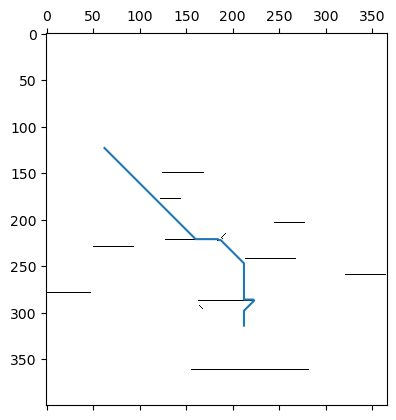

In [10]:
plot(environment, path)